In [24]:
import xgboost
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Imputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
sns.set()

# Import data

In [2]:
train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

Description of the data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

Many variables contain missng values, i.e. PoolQC only have 7 non-null values. It's possible that some features are rare and there is not **missing values** for categorical variables.
On the other hand, if the variable is numeric we need an approach to understand if is necessary take off the missing values or use some input to completed those fields

In [4]:
var_numeric = list(train.columns[train.dtypes != 'object'])

Variables *LotFrontage* and *GaraYrBlt* contain missing values

In [5]:
train[var_numeric].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

# Missing values in LotFrontage

In [92]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

There is outliers in LotFrontage variable

In [95]:
train.loc[train['LotFrontage'] == 21]['SalePrice'].describe()

count        23.000000
mean      94278.260870
std       13823.035995
min       75000.000000
25%       84950.000000
50%       91000.000000
75%      103000.000000
max      119500.000000
Name: SalePrice, dtype: float64

In [93]:
train.loc[train['LotFrontage'].isnull()]['SalePrice'].describe()

count       259.000000
mean     181620.073359
std       57841.775706
min       61000.000000
25%      143375.000000
50%      172400.000000
75%      215000.000000
max      466500.000000
Name: SalePrice, dtype: float64

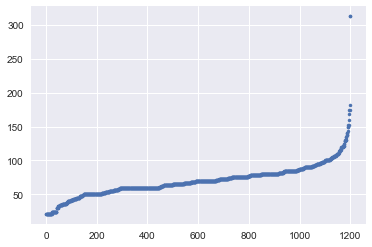

In [26]:
_= plt.plot(range(len(train.index)), train['LotFrontage'].sort_values(),marker='.', linestyle='none')
plt.show()

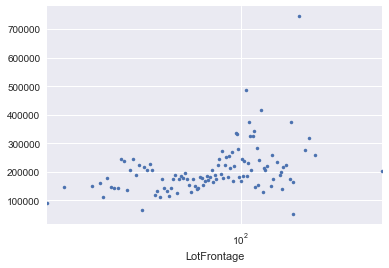

In [69]:
train.groupby(['LotFrontage'])['SalePrice'].median().plot(marker='.', linestyle='none')
_ = plt.xscale('log')
plt.show()